# [CoE202] note 11a. DQN : environment 
- Class Date : 21.06.10.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

0. In this example, we will simply take a look at the environment that we are going to use for reinforcement learning. That includes setting the game environment and visualizing the game.

1. Let's start with installing libraries for visualization.

In [ ]:
!apt-get install -y xvfb python-opengl x11-utils
!pip install gym==0.17.2 pyvirtualdisplay==0.2.5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
python-opengl is already the newest version (3.1.0+dfsg-1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


2. We need to import pyvirtualdisplay for inline visualization.

In [ ]:
from pyvirtualdisplay import Display

display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

3. We need to import gym which is a library that includes multiple game environments designing speifically for reinforcement leraning.

In [ ]:
import gym

# we can choose one of many games supported by gym
ENV_NAME = "BreakoutNoFrameskip-v4"
#ENV_NAME = "CartPole-v0"
#ENV_NAME = "MountainCar-v0"
#ENV_NAME = "Atlantis-v0"
#NV_NAME = "Pong-v0"

# initialte the environment
env = gym.make(ENV_NAME)

4. Let's retrieve a single frame from the environment and visualize that.

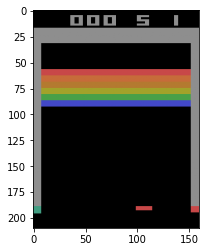

In [ ]:
import matplotlib.pyplot as plt

env.reset()
screen = env.render(mode='rgb_array')
plt.imshow(screen/255)

5. We are going to import more libraries for video rendering.

In [ ]:
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

6. Here's our function for video rendering.

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

7. Let's play the game with a random agent and collect the episode, then render it as a video.

In [ ]:
env_vis = wrap_env(gym.make(ENV_NAME))

observation = env_vis.reset()

while True:
  
    env.render()    
    action = env_vis.action_space.sample()  # random action     
    observation, reward, done, info = env_vis.step(action) 
           
    if done: 
      break;
            
env_vis.close()
show_video()